In [1]:
from torchvision.datasets import STL10
from torchvision import transforms

In [2]:
dataset = STL10('data',split='train', transform=transforms.ToTensor(), download=True)

100%|██████████| 2.64G/2.64G [08:58<00:00, 4.90MB/s]   


In [5]:
import matplotlib.pyplot as plt

In [13]:
import torch

In [14]:
image = dataset[0][0]

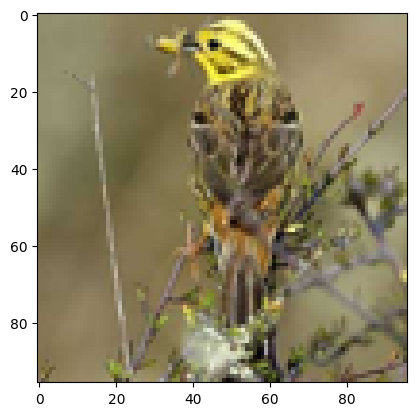

In [18]:
plt.imshow(image.permute(1, 2, 0))

In [34]:
selected_classes = ['airplane', 'car', 'ship', 'truck']
class_indices = [dataset.classes.index(cls) for cls in selected_classes]

In [35]:
class_indices

[0, 2, 8, 9]

In [37]:
targets = torch.tensor(dataset.labels)
mask = torch.tensor([target in class_indices for target in targets])

In [43]:
# Create a subset of the dataset
from torch.utils.data import Subset
filtered_dataset = Subset(dataset, torch.where(mask)[0])

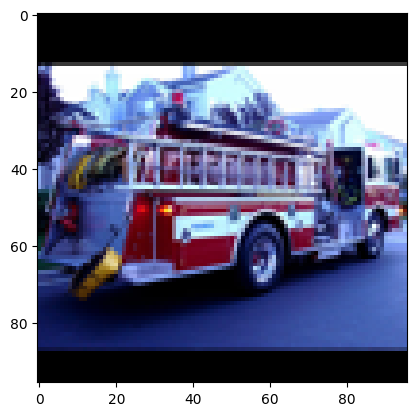

In [49]:
plt.imshow(filtered_dataset[0][0].permute(1, 2, 0))

2000